#ABOUT DATA
## Data Title: Students Adaptability Level in Online Education
Online Education has become a buzzword since the COVID-19 hit the World. Most of the educational institutions went online to continue educational activities while developing countries like Bangladesh took a significant period of time to ensure online education at every education level. <br>

Students of several levels also faced many difficulties when they got introduced to online education. It is important for the decision makers of educational institutions to be informed about the effectiveness of online education so that they can take further steps to make it more beneficial for the students.

START <br>


Import Libraries

In [1]:
!pip install matplotlib

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import scipy.stats as stat

##Data Preparation

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
df = pd.read_csv('/content/drive/MyDrive/A. Data Science dibimbing -23B/Finpro_Farhatul Hanifah Amalia/students_adaptability_level_online_education.csv')

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1205 entries, 0 to 1204
Data columns (total 14 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Gender               1205 non-null   object
 1   Age                  1205 non-null   object
 2   Education Level      1205 non-null   object
 3   Institution Type     1205 non-null   object
 4   IT Student           1205 non-null   object
 5   Location             1205 non-null   object
 6   Load-shedding        1205 non-null   object
 7   Financial Condition  1205 non-null   object
 8   Internet Type        1205 non-null   object
 9   Network Type         1205 non-null   object
 10  Class Duration       1205 non-null   object
 11  Self Lms             1205 non-null   object
 12  Device               1205 non-null   object
 13  Adaptivity Level     1205 non-null   object
dtypes: object(14)
memory usage: 131.9+ KB


In [6]:
df.tail()

,Gender,Age,Education Level,Institution Type,IT Student,Location,Load-shedding,Financial Condition,Internet Type,Network Type,Class Duration,Self Lms,Device,Adaptivity Level
1200,Girl,16-20,College,Non Government,No,Yes,Low,Mid,Wifi,4G,1-3,No,Mobile,Low
1201,Girl,16-20,College,Non Government,No,No,High,Mid,Wifi,4G,3-6,No,Mobile,Moderate
1202,Boy,11-15,School,Non Government,No,Yes,Low,Mid,Mobile Data,3G,1-3,No,Mobile,Moderate
1203,Girl,16-20,College,Non Government,No,No,Low,Mid,Wifi,4G,1-3,No,Mobile,Low
1204,Girl,11-15,School,Non Government,No,Yes,Low,Poor,Mobile Data,3G,1-3,No,Mobile,Moderate


In [7]:
df.describe().T

,count,unique,top,freq
Gender,1205,2,Boy,663
Age,1205,6,21-25,374
Education Level,1205,3,School,530
Institution Type,1205,2,Non Government,823
IT Student,1205,2,No,901
Location,1205,2,Yes,935
Load-shedding,1205,2,Low,1004
Financial Condition,1205,3,Mid,878
Internet Type,1205,2,Mobile Data,695
Network Type,1205,3,4G,775


Berdasarkan data yang digunakan, dataset terdiri dari:


*   14 kolom
*   1205 baris
*   Memiliki type data object

Data pada kolom, IT Student, Location dan Self LMS adalah tipe boolean. Kita akan ubah jadi 1 dan 0 (int) karena hanya bermakna Ya dan Tidak saja. Sedangkan data lain akan kita ubah menjadi tipe data categorical.

##Data Processing

In [8]:
#Walaupun di atas sudah terlihat tidak ada kolom yang kosong, tapi lebih baik dicek lagi.
df.isna().sum()

Gender                 0
Age                    0
Education Level        0
Institution Type       0
IT Student             0
Location               0
Load-shedding          0
Financial Condition    0
Internet Type          0
Network Type           0
Class Duration         0
Self Lms               0
Device                 0
Adaptivity Level       0
dtype: int64

In [9]:
#cek jumlah duplikat data
df.duplicated().sum()

949

In [10]:
duplikat = df[df.duplicated()]
duplikat

,Gender,Age,Education Level,Institution Type,IT Student,Location,Load-shedding,Financial Condition,Internet Type,Network Type,Class Duration,Self Lms,Device,Adaptivity Level
28,Girl,1-5,School,Non Government,No,Yes,Low,Mid,Mobile Data,4G,1-3,No,Mobile,Moderate
29,Girl,16-20,College,Non Government,No,Yes,High,Mid,Wifi,4G,3-6,No,Mobile,Moderate
34,Boy,11-15,School,Non Government,No,Yes,Low,Poor,Mobile Data,3G,1-3,No,Mobile,Low
42,Girl,16-20,School,Non Government,No,Yes,Low,Poor,Mobile Data,3G,0,No,Mobile,Low
43,Boy,11-15,School,Non Government,No,Yes,Low,Mid,Mobile Data,4G,1-3,No,Mobile,Moderate
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1200,Girl,16-20,College,Non Government,No,Yes,Low,Mid,Wifi,4G,1-3,No,Mobile,Low
1201,Girl,16-20,College,Non Government,No,No,High,Mid,Wifi,4G,3-6,No,Mobile,Moderate
1202,Boy,11-15,School,Non Government,No,Yes,Low,Mid,Mobile Data,3G,1-3,No,Mobile,Moderate
1203,Girl,16-20,College,Non Government,No,No,Low,Mid,Wifi,4G,1-3,No,Mobile,Low


Walaupun terlihat ada 949 data duplikat sepertinya hasilnya tidak relevan, karena bentuk data yang mostly categorical, jadi kemungkinan duplikasi memang cukup tinggi. Jadi untuk case ini kita abaikan duplikatnya.

##Data Manipulation

In [11]:
#ubah tipe data dari object ke categorical
df['Gender'] = df['Gender'].astype('category')
df['Age'] = df['Age'].astype('category')
df['Education Level'] = df['Education Level'].astype('category')
df['Institution Type'] = df['Institution Type'].astype('category')
df['Load-shedding'] = df['Load-shedding'].astype('category')
df['Financial Condition'] = df['Financial Condition'].astype('category')
df['Internet Type'] = df['Internet Type'].astype('category')
df['Network Type'] = df['Network Type'].astype('category')
df['Class Duration'] = df['Class Duration'].astype('category')
df['Device'] = df['Device'].astype('category')
df['Adaptivity Level'] = df['Adaptivity Level'].astype('category')
df['IT Student'] = df['IT Student'].astype('category')
df['Self Lms'] = df['Self Lms'].astype('category')
df['Location'] = df['Location'].astype('category')

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1205 entries, 0 to 1204
Data columns (total 14 columns):
 #   Column               Non-Null Count  Dtype   
---  ------               --------------  -----   
 0   Gender               1205 non-null   category
 1   Age                  1205 non-null   category
 2   Education Level      1205 non-null   category
 3   Institution Type     1205 non-null   category
 4   IT Student           1205 non-null   category
 5   Location             1205 non-null   category
 6   Load-shedding        1205 non-null   category
 7   Financial Condition  1205 non-null   category
 8   Internet Type        1205 non-null   category
 9   Network Type         1205 non-null   category
 10  Class Duration       1205 non-null   category
 11  Self Lms             1205 non-null   category
 12  Device               1205 non-null   category
 13  Adaptivity Level     1205 non-null   category
dtypes: category(14)
memory usage: 18.4 KB


In [13]:
#Buat data copy agar tidak mengganggu dataset asli
adapt = df.copy()

Untuk dataset adapt, saya akan buat jadi data numerical dengan mengubah beberapa menjadi boolean (1 0) untuk Yes No dan Ordinal encoding untuk data categorical yang bertingkat.

In [14]:
#ubah menjadi boolean untuk Yes and No
adapt.replace({'Yes': 1, 'No': 0}, inplace=True)

In [15]:
#prosesing Ordinal Encoding
adapt['Load-shedding'].replace({'Low' : 1 ,
                                      'High' : 2},
                                      inplace=True
                                      )
adapt['Financial Condition'].replace({'Poor' : 1 ,
                                            'Mid' : 2,
                                            'Rich' : 3},
                                            inplace=True
                                            )
adapt['Network Type'].replace({'2G' :  1,
                                     '3G' : 2,
                                     '4G' : 3},
                                     inplace=True
                                     )
adapt['Adaptivity Level'].replace({'Low' : 1 ,
                                         'Moderate' : 2 ,
                                         'High' : 3},
                                        inplace=True
                                        )
adapt['Age'].replace({'26-30' : 6,
                      '21-25' : 5,
                      '16-20' : 4,
                      '11-15' : 3,
                      '6-10': 2,
                      '1-5': 1},
                     inplace=True
                     )
adapt['Class Duration'].replace({'3-6': 2,
                                 '1-3' : 1},
                                inplace=True
                                )

In [16]:
# Ubah kategori menjadi integer
adapt['Load-shedding'] = adapt['Load-shedding'].cat.codes
adapt['Financial Condition'] = adapt['Financial Condition'].cat.codes
adapt['Network Type'] = adapt['Network Type'].cat.codes
adapt['Adaptivity Level'] = adapt['Adaptivity Level'].cat.codes
adapt['Age'] = adapt['Age'].cat.codes
adapt['Class Duration'] = adapt['Class Duration'].cat.codes
adapt['IT Student'] = adapt['IT Student'].cat.codes
adapt['Location'] = adapt['Location'].cat.codes
adapt['Self Lms'] = adapt['Self Lms'].cat.codes

# Ubah tipe data integer
adapt['Load-shedding'] = adapt['Load-shedding'].astype(int)
adapt['Financial Condition'] = adapt['Financial Condition'].astype(int)
adapt['Network Type'] = adapt['Network Type'].astype(int)
adapt['Adaptivity Level'] = adapt['Adaptivity Level'].astype(int)
adapt['Age'] = adapt['Age'].astype(int)
adapt['Class Duration'] = adapt['Class Duration'].astype(int)
adapt['IT Student'] = adapt['IT Student'].astype(int)
adapt['Location'] = adapt['Location'].astype(int)
adapt['Self Lms'] = adapt['Self Lms'].astype(int)

In [17]:
adapt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1205 entries, 0 to 1204
Data columns (total 14 columns):
 #   Column               Non-Null Count  Dtype   
---  ------               --------------  -----   
 0   Gender               1205 non-null   category
 1   Age                  1205 non-null   int64   
 2   Education Level      1205 non-null   category
 3   Institution Type     1205 non-null   category
 4   IT Student           1205 non-null   int64   
 5   Location             1205 non-null   int64   
 6   Load-shedding        1205 non-null   int64   
 7   Financial Condition  1205 non-null   int64   
 8   Internet Type        1205 non-null   category
 9   Network Type         1205 non-null   int64   
 10  Class Duration       1205 non-null   int64   
 11  Self Lms             1205 non-null   int64   
 12  Device               1205 non-null   category
 13  Adaptivity Level     1205 non-null   int64   
dtypes: category(5), int64(9)
memory usage: 91.4 KB


In [18]:
adapt.head()

,Gender,Age,Education Level,Institution Type,IT Student,Location,Load-shedding,Financial Condition,Internet Type,Network Type,Class Duration,Self Lms,Device,Adaptivity Level
0,Boy,3,University,Non Government,0,1,1,0,Wifi,2,2,0,Tab,2
1,Girl,3,University,Non Government,0,1,0,0,Mobile Data,2,1,1,Mobile,2
2,Girl,2,College,Government,0,1,1,0,Wifi,2,1,0,Mobile,2
3,Girl,1,School,Non Government,0,1,1,0,Mobile Data,2,1,0,Mobile,2
4,Girl,2,School,Non Government,0,1,1,1,Mobile Data,1,0,0,Mobile,1


Type data sudah berubah dan tidak terlihat ada nilai null atau Nan pada dataset.

In [19]:
#check unique value
for klm in df.columns:
    unique_values = df[klm].unique()
    print(f"Data unik {klm}: {unique_values}")

Data unik Gender: ['Boy', 'Girl']
Categories (2, object): ['Boy', 'Girl']
Data unik Age: ['21-25', '16-20', '11-15', '26-30', '6-10', '1-5']
Categories (6, object): ['1-5', '11-15', '16-20', '21-25', '26-30', '6-10']
Data unik Education Level: ['University', 'College', 'School']
Categories (3, object): ['College', 'School', 'University']
Data unik Institution Type: ['Non Government', 'Government']
Categories (2, object): ['Government', 'Non Government']
Data unik IT Student: ['No', 'Yes']
Categories (2, object): ['No', 'Yes']
Data unik Location: ['Yes', 'No']
Categories (2, object): ['No', 'Yes']
Data unik Load-shedding: ['Low', 'High']
Categories (2, object): ['High', 'Low']
Data unik Financial Condition: ['Mid', 'Poor', 'Rich']
Categories (3, object): ['Mid', 'Poor', 'Rich']
Data unik Internet Type: ['Wifi', 'Mobile Data']
Categories (2, object): ['Mobile Data', 'Wifi']
Data unik Network Type: ['4G', '3G', '2G']
Categories (3, object): ['2G', '3G', '4G']
Data unik Class Duration: ['3

#EDA

In [20]:
#group column names based on type
num = ['Age','IT Student','Location','Load-shedding','Financial Condition','Network Type','Class Duration','Self Lms','Adaptivity Level']
cat = ['Gender','Education Level','Institution Type','Internet Type','Device']

In [21]:
#saya ingin bikin patern warna untuk adaptivity level
custom_pallete = {'Moderate':'bisque','Low':'salmon','High':'palegreen'}

## Adaptivity Level

<ipython-input-88-73bd2552d989>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Adaptivity Level', data=df, order=adaptivity_order, palette=custom_pallete)


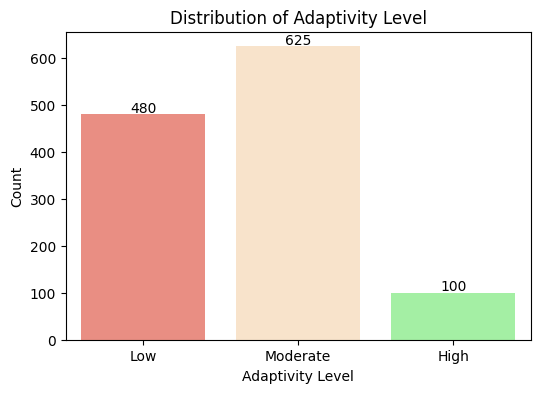

In [88]:
# Urutkan variabel adaptivity level
adaptivity_order = ['Low', 'Moderate', 'High']

# Hitung nilai count untuk setiap kategori adaptivity level
count_values = df['Adaptivity Level'].value_counts()[adaptivity_order]

# Buat plot menggunakan Seaborn
plt.figure(figsize=(6, 4))
sns.countplot(x='Adaptivity Level', data=df, order=adaptivity_order, palette=custom_pallete)

# Tambahkan nilai count di atas setiap bar
for index, value in enumerate(count_values):
    plt.text(index, value + 5, str(value), ha='center', fontsize=10)

# Atur label dan judul
plt.xlabel('Adaptivity Level')
plt.ylabel('Count')
plt.title('Distribution of Adaptivity Level')

# Tampilkan plot
plt.show()

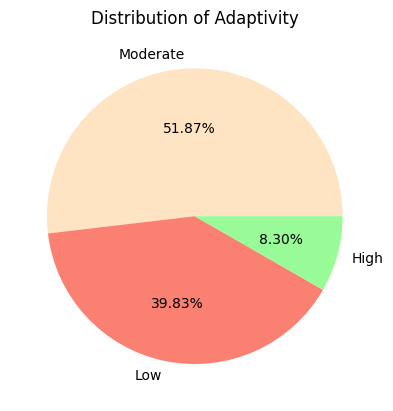

In [23]:
adapt_count = df['Adaptivity Level'].value_counts()
labels = ['Moderate','Low',"High"]
colors = ['bisque','salmon','palegreen']

plt.pie(adapt_count, labels=adapt_count.index, colors=colors, autopct='%.2f%%')
plt.title('Distribution of Adaptivity')
plt.show()

##Demographic Variable

###Gender

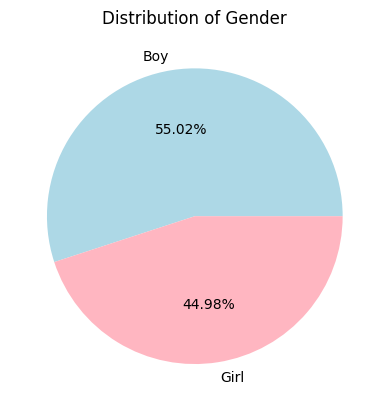

In [24]:
gender_count = df['Gender'].value_counts()
plt.pie(gender_count, labels=gender_count.index, colors=['lightblue','lightpink'], autopct='%.2f%%')
plt.title('Distribution of Gender')
plt.show()

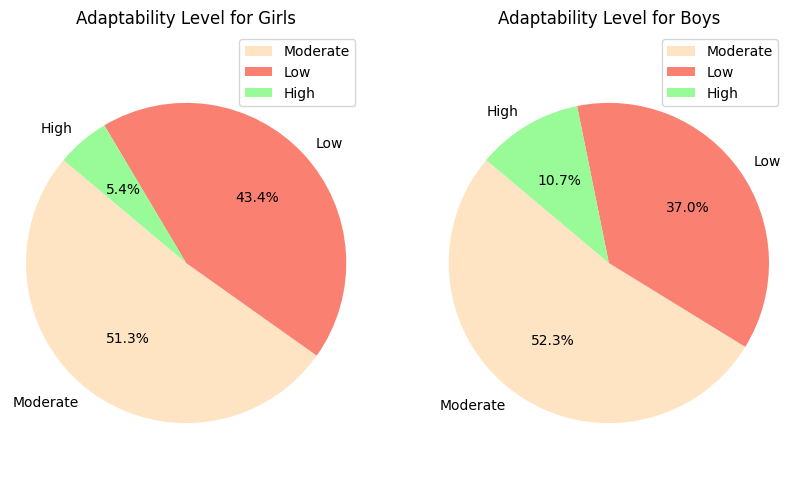

In [25]:
grouped_gender = df.groupby('Gender')['Adaptivity Level'].value_counts()
adaptability_girl = grouped_gender['Girl']
adaptability_boy = grouped_gender['Boy']
labels = ['Moderate','Low',"High"]
colors = ['bisque','salmon','palegreen']

plt.figure(figsize=(10, 6))
plt.subplot(1, 2, 1)
plt.pie(adaptability_girl, autopct='%1.1f%%', startangle=140, labels = labels, colors = colors)
plt.title('Adaptability Level for Girls')
plt.axis('equal')
plt.legend(labels=adaptability_girl.index)

plt.subplot(1, 2, 2)
plt.pie(adaptability_boy, autopct='%1.1f%%', startangle=140, labels = labels, colors = colors)
plt.title('Adaptability Level for Boys')
plt.axis('equal')
plt.legend(labels=adaptability_boy.index)
plt.show()

* Lebih dari setengah populasi data adalah Laki -laki
* persentasi adaptasi tinggi pada anak laki-laki untuk pembelajaran online juga lebih banyak dibanding anak perempuan

###Location

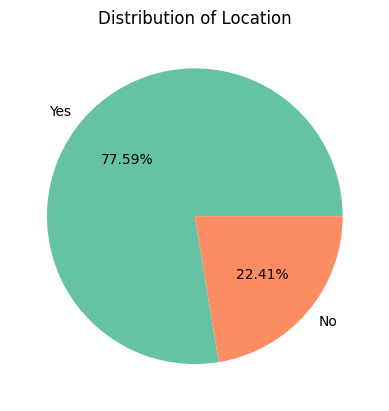

In [26]:
gender_count = df['Location'].value_counts()
plt.pie(gender_count, labels=gender_count.index, colors=sns.color_palette('Set2'), autopct='%.2f%%')
plt.title('Distribution of Location')
plt.show()

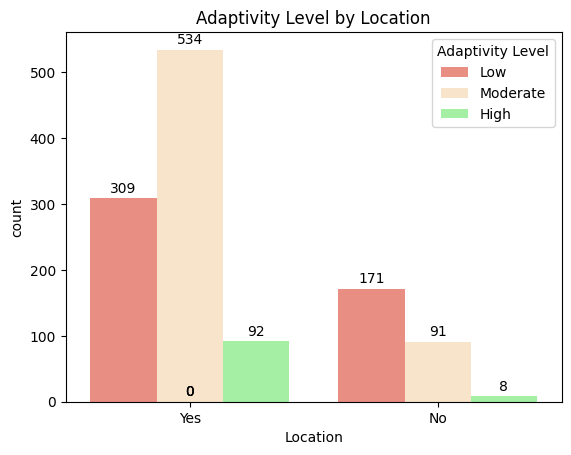

In [27]:
ax = sns.countplot(data=df,
                   x='Location',
                   hue='Adaptivity Level',
                   order=df['Location'].unique(),
                   hue_order=adaptivity_order,
                   palette=custom_pallete)

# Tambahkan jumlah count di atas setiap bar
for p in ax.patches:
    ax.annotate(format(p.get_height(), '.0f'),
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha = 'center', va = 'center',
                xytext = (0, 7),
                textcoords = 'offset points')

# Tambahkan judul
plt.title('Adaptivity Level by Location')

# Tampilkan plot
plt.show()

In [28]:
grouped_location = df.groupby('Location')['Adaptivity Level'].value_counts()
adaptability_yes = grouped_location['Yes']
adaptability_no = grouped_location['No']
labels = ['Moderate','Low',"High"]
colors = ['bisque','salmon','palegreen']

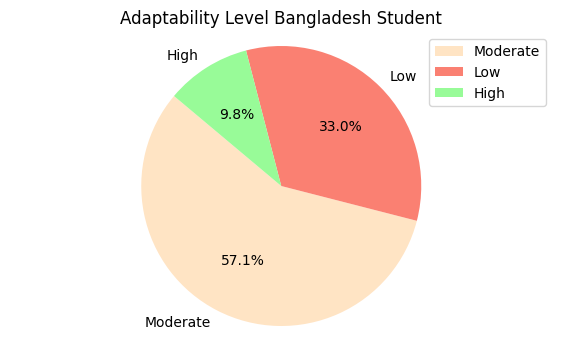

In [29]:
plt.figure(figsize=(7, 4))
plt.pie(adaptability_yes, autopct='%1.1f%%', startangle=140, labels = labels, colors = colors)
plt.title('Adaptability Level Bangladesh Student')
plt.axis('equal')
plt.legend(labels=adaptability_yes.index)

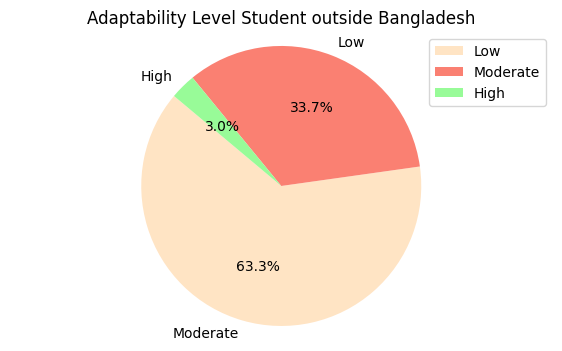

In [30]:
plt.figure(figsize=(7, 4))
plt.pie(adaptability_no, autopct='%1.1f%%', startangle=140, labels = labels, colors = colors)
plt.title('Adaptability Level Student outside Bangladesh')
plt.axis('equal')
plt.legend(labels=adaptability_no.index)
plt.show()

###Financial Condition

In [31]:
Financial_table = df['Financial Condition'].value_counts()
Financial_table

Mid     878
Poor    242
Rich     85
Name: Financial Condition, dtype: int64

In [32]:
Financial_adapt = df.groupby('Adaptivity Level')['Financial Condition'].value_counts()
print(Financial_adapt)

Adaptivity Level  Financial Condition
High              Rich                    42
                  Mid                     36
                  Poor                    22
Low               Mid                    341
                  Poor                   129
                  Rich                    10
Moderate          Mid                    501
                  Poor                    91
                  Rich                    33
Name: Financial Condition, dtype: int64


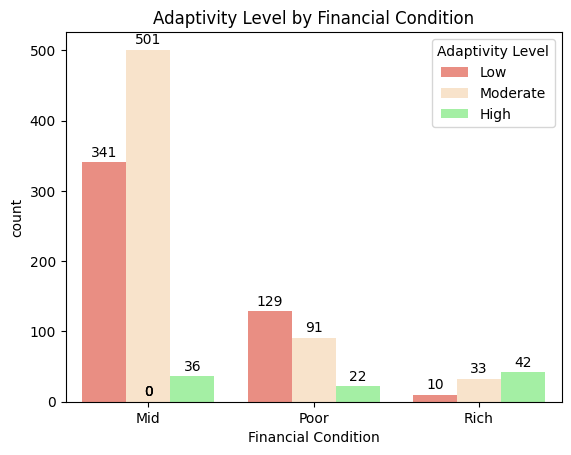

In [33]:
ax = sns.countplot(data=df,
                   x='Financial Condition',
                   hue='Adaptivity Level',
                   order=df['Financial Condition'].unique(),
                   hue_order=adaptivity_order,
                   palette=custom_pallete)

# Tambahkan jumlah count di atas setiap bar
for p in ax.patches:
    ax.annotate(format(p.get_height(), '.0f'),
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha = 'center', va = 'center',
                xytext = (0, 7),
                textcoords = 'offset points')

# Tambahkan judul
plt.title('Adaptivity Level by Financial Condition')

# Tampilkan plot
plt.show()

###Age and Educational Features


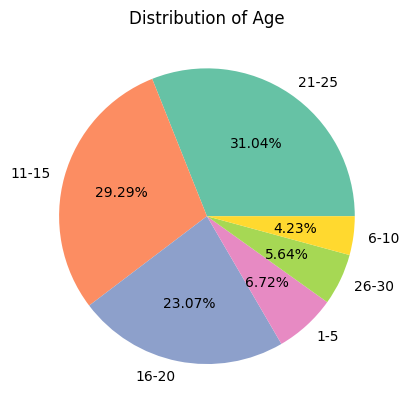

In [34]:
age_count = df['Age'].value_counts()
plt.pie(age_count, labels=age_count.index, colors=sns.color_palette('Set2'), autopct='%.2f%%')
plt.title('Distribution of Age')
plt.show()

In [35]:
skewness_age = adapt['Age'].skew()

print("Skewness of Age data:", skewness_age)

Skewness of Age data: 0.30115730605339974


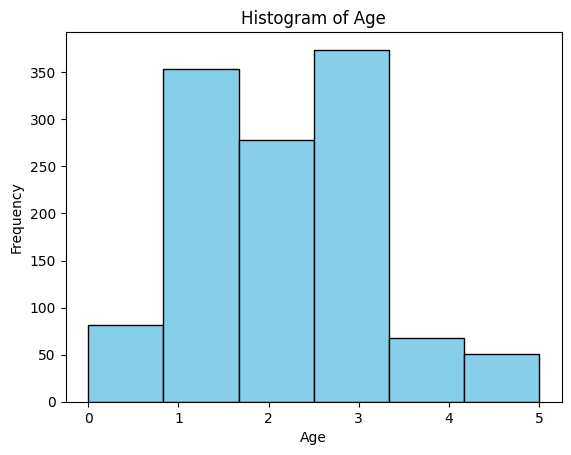

In [36]:
plt.hist(adapt['Age'], bins=6, color='skyblue', edgecolor='black')

# Menambahkan label dan judul
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.title('Histogram of Age')

# Menampilkan histogram
plt.show()

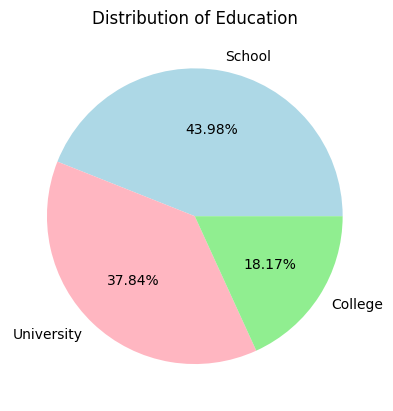

In [37]:
edu_count = df['Education Level'].value_counts()
plt.pie(edu_count, labels=edu_count.index, colors=['lightblue','lightpink','lightgreen'], autopct='%.2f%%')
plt.title('Distribution of Education')
plt.show()

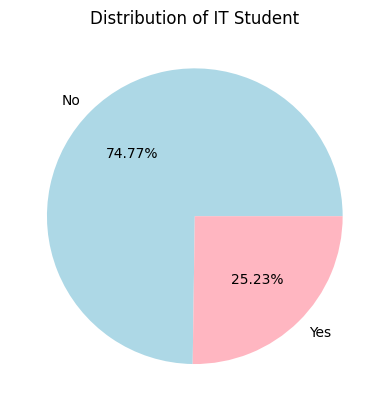

In [38]:
it_count = df['IT Student'].value_counts()
plt.pie(it_count, labels=it_count.index, colors=['lightblue','lightpink'], autopct='%.2f%%')
plt.title('Distribution of IT Student')
plt.show()

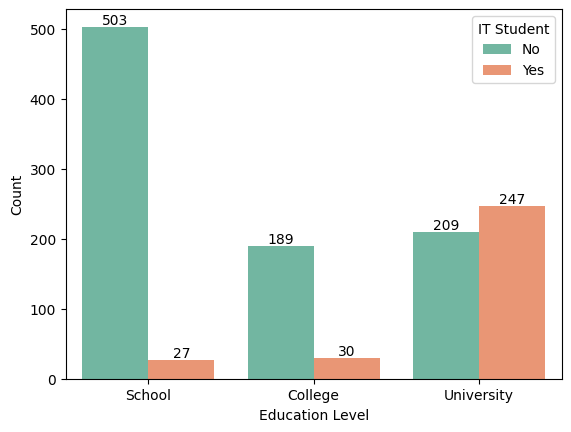

In [49]:
# Mengurutkan Education Level
education_order = ['School', 'College', 'University']

ax = sns.countplot(data=df,
                   x='Education Level',
                   hue='IT Student',
                   order=education_order,
                   palette='Set2'
                   )

plt.xlabel('Education Level')
plt.ylabel('Count')

for p in ax.patches:
    height = p.get_height() if not np.isnan(p.get_height()) else 0
    if height > 0:
        ax.annotate(format(height, '.0f'),
                    (p.get_x() + p.get_width() / 2., height),
                    ha='center', va='center',
                    xytext=(0, 5),
                    textcoords='offset points')

plt.show()


In [90]:
#kita lihat faktor IT Student yang terbiasa dengan hal-hal online
grouped_it = df.groupby('IT Student')['Adaptivity Level'].value_counts()
adaptability_it = grouped_it['Yes']
adaptability_non_it = grouped_it['No']

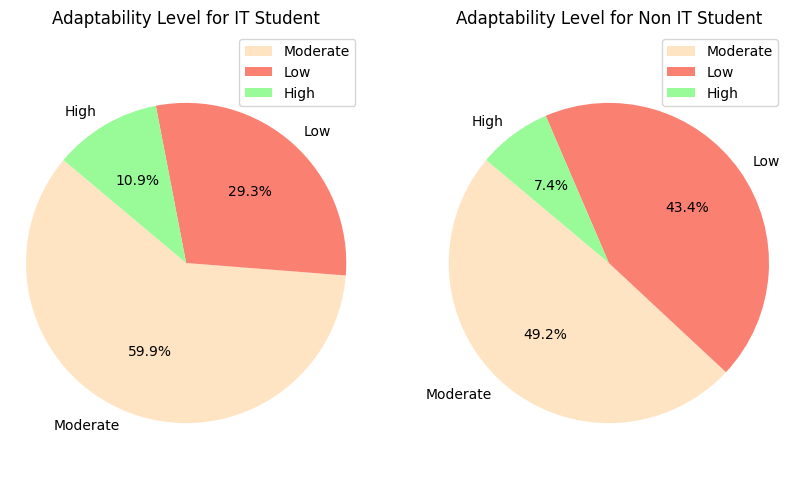

In [93]:
labels = ['Moderate','Low',"High"]
colors = ['bisque','salmon','palegreen']

plt.figure(figsize=(10, 6))
plt.subplot(1, 2, 1)
plt.pie(adaptability_it, autopct='%1.1f%%', startangle=140,labels = labels, colors = colors)
plt.title('Adaptability Level for IT Student')
plt.axis('equal')
plt.legend(labels=adaptability_it.index)

plt.subplot(1, 2, 2)
plt.pie(adaptability_non_it, autopct='%1.1f%%', startangle=140,labels = labels, colors = colors)
plt.title('Adaptability Level for Non IT Student')
plt.axis('equal')
plt.legend(labels=adaptability_non_it.index)
plt.show()

###Eksternal Feature

In [48]:
#Cek network factor
network_data = df.groupby(['Network Type']).agg(
    count_adapt=('Adaptivity Level','count')
).reset_index()

network_data

,Network Type,count_adapt
0,2G,19
1,3G,411
2,4G,775


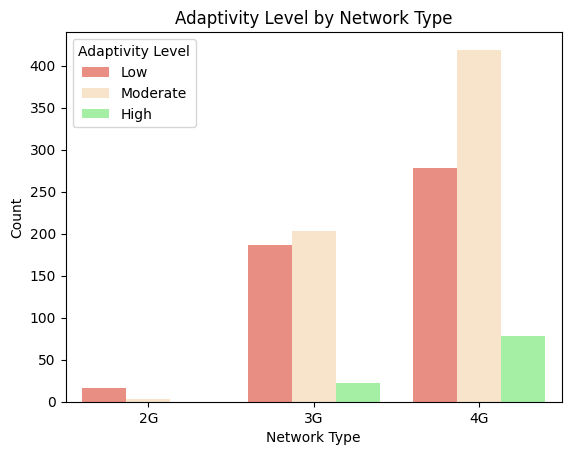

In [59]:
# Mengurutkan urutan network type
network_order = ['2G', '3G', '4G']

an = sns.countplot(data=df,
                   x='Network Type',
                   hue='Adaptivity Level',
                   palette=custom_pallete,
                   order=network_order,
                   hue_order=adaptivity_order
                   )

plt.xlabel('Network Type')
plt.ylabel('Count')
plt.title('Adaptivity Level by Network Type')
plt.show()

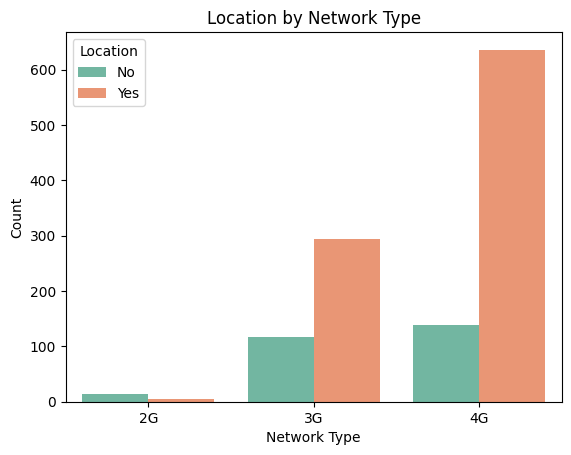

In [62]:
sns.countplot(data=df,
            x='Network Type',
            hue='Location',
            order=network_order,
             palette='Set2'
            )
plt.xlabel('Network Type')
plt.ylabel('Count')
plt.title('Location by Network Type')
plt.show()

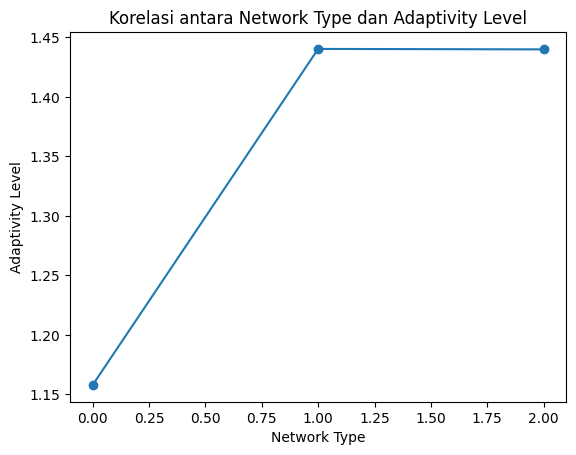

In [82]:
grouped_net_adapt = adapt.groupby('Network Type')['Adaptivity Level'].mean()

# Gunakan plot untuk membuat line chart
grouped_net_adapt.plot(kind='line', marker='o', linestyle='-')

# Menambahkan label sumbu dan judul grafik
plt.xlabel('Network Type')
plt.ylabel('Adaptivity Level')
plt.title('Korelasi antara Network Type dan Adaptivity Level')

# Menampilkan grafik
plt.show()

###Corelation Heatmap

<ipython-input-84-f3d6a7b3bac3>:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_num = adapt.corr()


<Axes: >

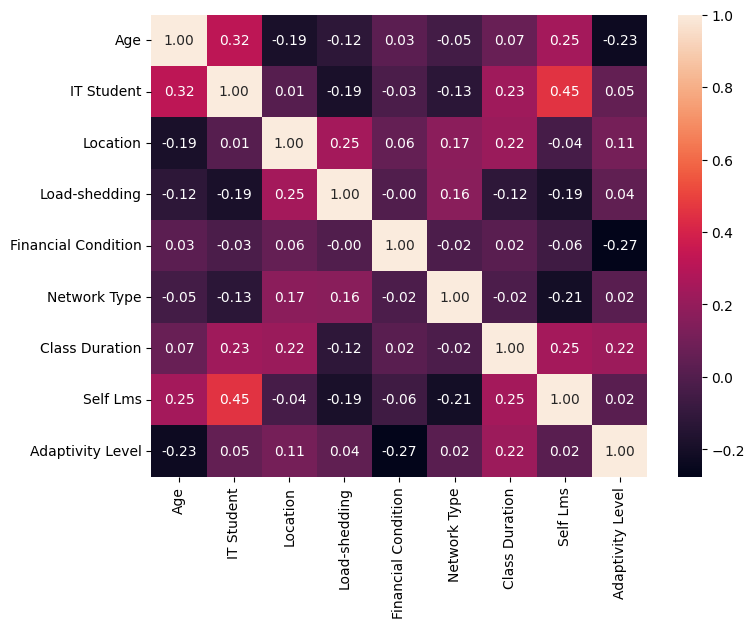

In [84]:
# correlation heatmap
plt.figure(figsize=(8,6))
correlation_num = adapt.corr()
sns.heatmap(correlation_num, annot=True, fmt='.2f')

In [85]:
#lakukan hot encoding
encoded_df = pd.get_dummies(adapt)

In [86]:
encoded_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1205 entries, 0 to 1204
Data columns (total 21 columns):
 #   Column                           Non-Null Count  Dtype
---  ------                           --------------  -----
 0   Age                              1205 non-null   int64
 1   IT Student                       1205 non-null   int64
 2   Location                         1205 non-null   int64
 3   Load-shedding                    1205 non-null   int64
 4   Financial Condition              1205 non-null   int64
 5   Network Type                     1205 non-null   int64
 6   Class Duration                   1205 non-null   int64
 7   Self Lms                         1205 non-null   int64
 8   Adaptivity Level                 1205 non-null   int64
 9   Gender_Boy                       1205 non-null   uint8
 10  Gender_Girl                      1205 non-null   uint8
 11  Education Level_College          1205 non-null   uint8
 12  Education Level_School           1205 non-null  

<Axes: >

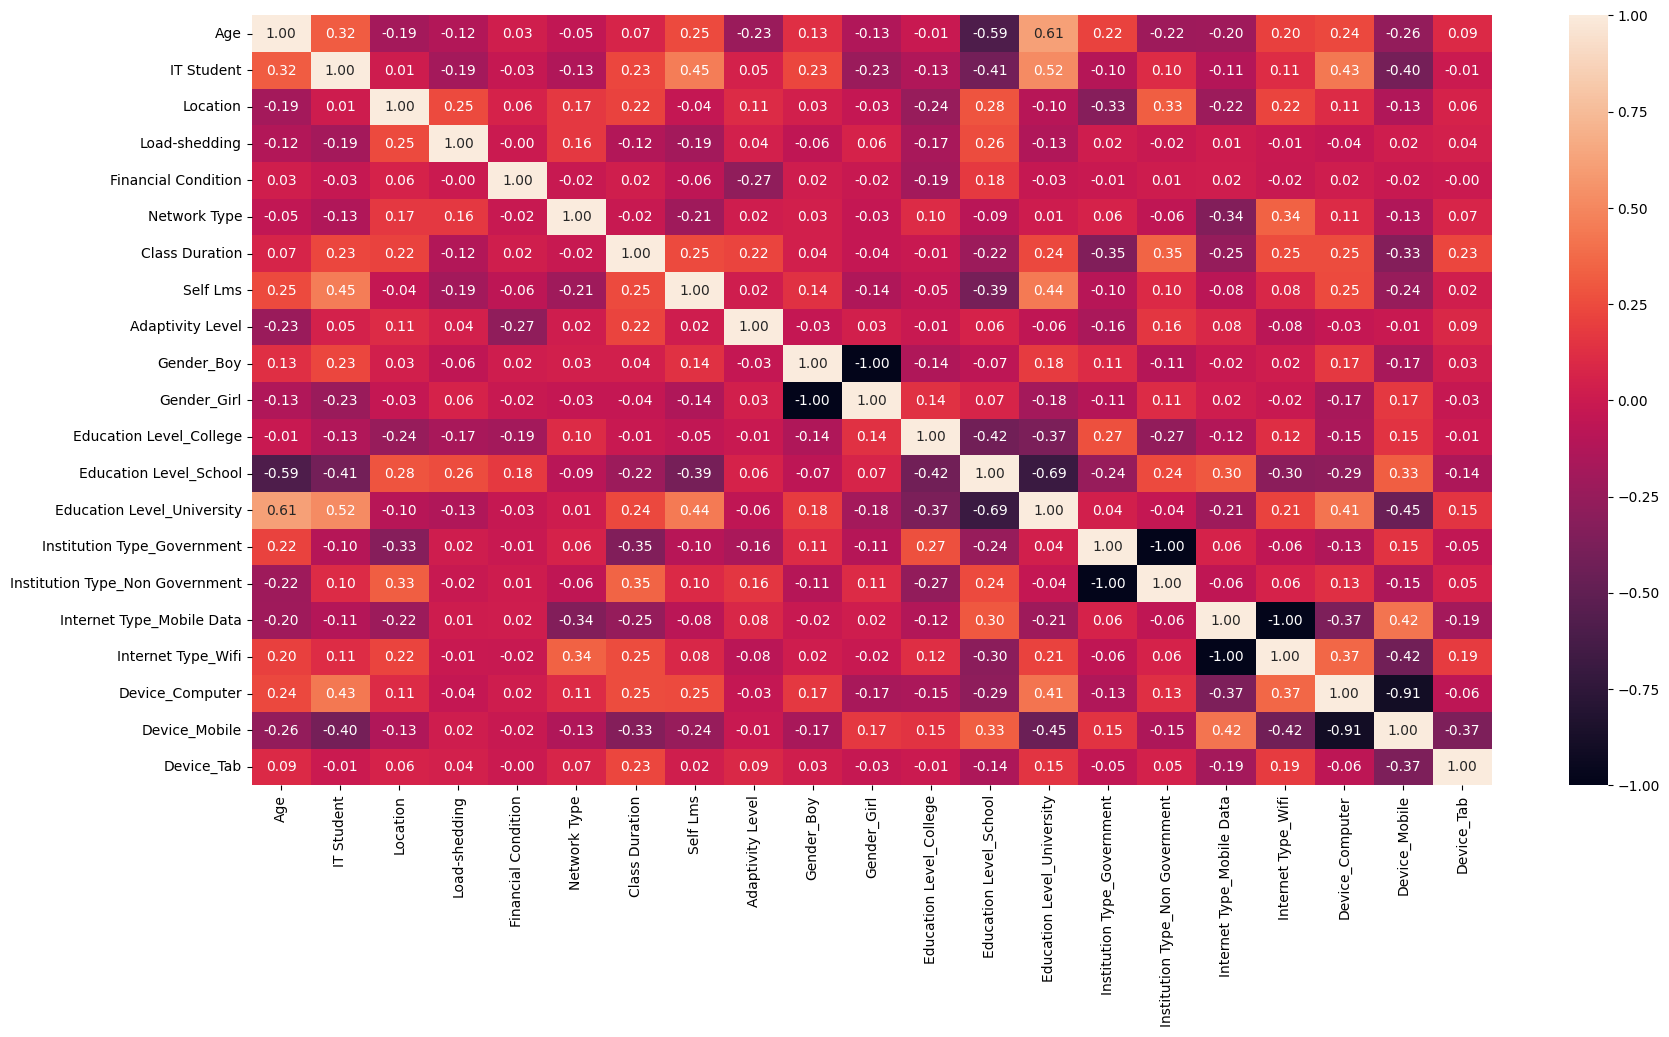

In [87]:
# correlation heatmap
plt.figure(figsize=(20,10))
correlation = encoded_df.corr()
sns.heatmap(correlation, annot=True, fmt='.2f')

##EDA Resume

Dari sekilas EDA di atas, ternyata:
1. Anak laki-laki memiliki persentase adaptasi yang lebih tinggi dibanding perempuan.
2. Adaptasi IT Student lebih tinggi dibanding adaptasi non IT Student, namun ini tidak semata-mata karena jurusan IT tapi lebih ke umur dan tingkat edukasi karena IT student hanya 25% dari total populasi.
3. Tipe Jaringan Internet terlihat memiliki pengaruh untuk tingkat adaptasi. Untuk tipe 4G terlihat lebih banyak yang bisa beradaptasi dengan sangat baik (high) dan cukup baik (Moderate) dibanding tipe jaringan 2G dan 3G.

Deep Dive Questions:
1. Apakah Network Type memiliki pengaruh yang paling besar terhadap Adaptivy level di antara faktor lainnya?
2. Apakah semakin baik Network Type maka semakin baik juga adaptivity levelnya?
3. Bagaimana keterkaitan antara IT Student dengan adaptivity level?

#Hipotesis - Uji Chi Square

Dari data yang telah dilihat pada EDA, saya tertarik melihat hubungan beberapa hal. Maka kita coba buat Hipotesis untuk melihat hubungan antara Adaptivity Level dengan feature berikut:
* Gender
* IT Student
* Network Level

H0: Tidak ada asosiasi signifikan antara feature dan Adaptivity Label<br>
H1: Ada asosiasi yang signifikan<br><br>
Kita gunakan metode chi-square dan nilai 0.05 sebagai p-value.


In [64]:
#Gunakan Chi Square untuk melihat hubungan dua variable
from scipy.stats import chi2_contingency

In [68]:
#Network Level x Adaptivity
observed_net = pd.crosstab(df['Network Type'], df['Adaptivity Level'])
chi2, p_value_net, dof, expected = chi2_contingency(observed_net)
if p_value_net < 0.05:
  print("Nilai p value =",p_value_net,"\nAda asosiasi yang signifikan antara Network Level dan Adaptivity Level")

else:
  print("Tidak ada asosiasi signifikan antara kedua variabel")

Nilai p value = 4.367322677925763e-06 
Ada asosiasi yang signifikan antara Network Level dan Adaptivity Level


In [69]:
#Gender x Adaptivity
observed_gender = pd.crosstab(df['Gender'], df['Adaptivity Level'])
chi2, p_value_gender, dof, expected = chi2_contingency(observed_gender)
if p_value_net < 0.05:
  print("Nilai p value =",p_value_gender,"\nAda asosiasi yang signifikan antara Gender dan Adaptivity Level")

else:
  print("Tidak ada asosiasi signifikan antara kedua variabel")

Nilai p value = 0.0011997056689743298 
Ada asosiasi yang signifikan antara Gender dan Adaptivity Level


In [70]:
#IT Student x Adaptivity
observed_it = pd.crosstab(df['IT Student'], df['Adaptivity Level'])
chi2, p_value_it, dof, expected = chi2_contingency(observed_it)
if p_value_it < 0.05:
  print("Nilai p value =",p_value_it,"\nAda asosiasi yang signifikan antara IT Student dan Adaptivity Level")

else:
  print("Tidak ada asosiasi signifikan antara kedua variabel")

Nilai p value = 5.553333138404098e-05 
Ada asosiasi yang signifikan antara IT Student dan Adaptivity Level


Dari hasil Uji Chi Square terhadap ketiga variabel, dapat terlihat jelas kalau ketiganya memiliki asosiasi yang signifikan dengan ```Adaptivity Level```. Maka kita coba cek semua variabel yang ada, dengan menggunakan uji Chi Square untuk mengetahui variabel mana yang paling signifikan mempengaruhi ```Adaptivity Level```.

In [71]:
#lakukan uji chi square untuk semua variabel
for i in df.columns.tolist() :
    test = df.groupby([i, 'Adaptivity Level'])['Gender'].count().unstack()
    _, p_val, _, _ = stat.chi2_contingency(test)
    if p_val.round(5) <=0.05:
        print(i, '- Adaptivity Level p-value:', p_val )

Gender - Adaptivity Level p-value: 0.0011997056689743298
Age - Adaptivity Level p-value: 4.24520624863266e-22
Education Level - Adaptivity Level p-value: 8.088376597327654e-08
Institution Type - Adaptivity Level p-value: 5.516916084156889e-24
IT Student - Adaptivity Level p-value: 5.553333138404098e-05
Location - Adaptivity Level p-value: 1.3386485938039274e-18
Load-shedding - Adaptivity Level p-value: 0.006832617382812384
Financial Condition - Adaptivity Level p-value: 4.391228197442381e-50
Internet Type - Adaptivity Level p-value: 2.7048827686608964e-05
Network Type - Adaptivity Level p-value: 4.367322677925763e-06
Class Duration - Adaptivity Level p-value: 9.983962891861e-48
Self Lms - Adaptivity Level p-value: 3.8588766460420006e-07
Device - Adaptivity Level p-value: 1.0744813411621724e-10
Adaptivity Level - Adaptivity Level p-value: 0.0


In [75]:
min_p_value = float('inf')

# Inisialisasi variabel yang paling signifikan
most_significant_variable = None

for i in df.columns.tolist():
   if i != 'Adaptivity Level': #mengecualikan nilai adaptivity valuenya karena dia adalah target
    test = df.groupby([i, 'Adaptivity Level'])['Age'].count().unstack()
    _, p_val, _, _ = stat.chi2_contingency(test)
    if p_val < min_p_value:
        min_p_value = p_val
        most_significant_variable = i

print("Variabel paling signifikan:", most_significant_variable)
print("Nilai p-value terendah:", min_p_value)

Variabel paling signifikan: Financial Condition
Nilai p-value terendah: 4.391228197442381e-50


Dari hasil pengecekan nilai p-value dari hasil uji chi-square, ternyata faktor financial memiliki asosiasi paling signifikan terhadap Adaptivity level karena nilai p-value kurang dari 0.05 dan paling rendah dibanding faktor lainnya. (mendekati nol) yaitu 4.391228197442381e-50.

#Kendall's Tau

Setelah menggunakan Uji Chi Square untuk melihat hubungan antara dua variabel kategorikal pada dataset df (original dataset). Aku juga mau mengukur korelasi atau hubungan peringkat antara dua variabel ordinal dari dataset yang sudah dimanipulasi menjadi ```adapt``` dataset. Untuk mendukung hasil hipotesis pada Chi Square.

In [77]:
from scipy.stats import kendalltau

results = []

# Loop melalui setiap kolom numerik dan hitung Kendall's Tau dan p-value
for col in num:
    kendall_tau, p_value = kendalltau(adapt[col], adapt['Adaptivity Level'])
    results.append({'Column': col, "Kendall's Tau": kendall_tau, 'P-value': p_value})

# Buat DataFrame dari hasil perhitungan
results_adapt = pd.DataFrame(results)

# Tampilkan DataFrame
print(results_adapt)

                Column  Kendall's Tau        P-value
0                  Age      -0.175803   3.974028e-12
1           IT Student       0.066713   1.692131e-02
2             Location       0.142381   3.442763e-07
3        Load-shedding       0.054982   4.901781e-02
4  Financial Condition      -0.215882   2.295047e-15
5         Network Type       0.035150   2.048798e-01
6       Class Duration       0.249493   2.323724e-20
7             Self Lms       0.047085   9.184954e-02
8     Adaptivity Level       1.000000  1.098905e-298


In [78]:
from scipy.stats import kendalltau

results = []

# Loop melalui setiap kolom numerik dan hitung Kendall's Tau dan p-value
for col in num:
    kendall_tau, p_value = kendalltau(df[col], df['Adaptivity Level'])
    results.append({'Column': col, "Kendall's Tau": kendall_tau, 'P-value': p_value})

# Buat DataFrame dari hasil perhitungan
results_df = pd.DataFrame(results)

# Tampilkan DataFrame
print(results_df)

                Column  Kendall's Tau        P-value
0                  Age      -0.175803   3.974028e-12
1           IT Student       0.066713   1.692131e-02
2             Location       0.142381   3.442763e-07
3        Load-shedding       0.054982   4.901781e-02
4  Financial Condition      -0.215882   2.295047e-15
5         Network Type       0.035150   2.048798e-01
6       Class Duration       0.249493   2.323724e-20
7             Self Lms       0.047085   9.184954e-02
8     Adaptivity Level       1.000000  1.098905e-298


Berdasarkan hasil dari Kendall's Tau variabel yang berkorelasi antara lain:
- ```Age``` dan ```Financial Condition``` berkorelasi negatif: Semakin tua dan semakin buruk kondisi financial cenderung membuat siswa memiliki tingkat adaptabilitas yang lebih rendah.
- ```IT Student``` , ```Class Duration``` dan ```Location``` berkorelasi positif: Pelajar yang memiliki durasi kelas lebih lama, pelajar yang tinggal di kota Bangladesh serta Mahasiswa IT memiliki tingkat adaptasi yang lebih baik.

###Uji Hubungan Financial Condition dengan Variabel Lain
Karena Financial Condition ternyata memiliki asosiasi paling significant dari uji chi square dan memiliki korelasi negatif setelah dicek menggunakan Kendall's Tau. Saya ingin melihat korelasinya dengan variabel-variabel lain.


In [81]:
import pandas as pd
from scipy.stats import kendalltau

# Inisialisasi list untuk menyimpan hasil
results = []

# Looping melalui setiap kolom kecuali Financial Condition
for column in df.columns:
    if column != 'Financial Condition':
        # Hitung nilai Kendall's Tau dan p-value
        tau, p_value = kendalltau(df[column], df['Financial Condition'])
        # Tambahkan hasil ke list
        results.append({'Variable': column, 'Kendall Tau': tau, 'P-value': p_value})

# Buat DataFrame dari hasil
results_df = pd.DataFrame(results)

# Tampilkan DataFrame
print(results_df)


            Variable  Kendall Tau       P-value
0             Gender    -0.008791  7.544784e-01
1                Age    -0.022308  3.816550e-01
2    Education Level     0.058708  2.804366e-02
3   Institution Type     0.029484  2.942082e-01
4         IT Student    -0.040348  1.511668e-01
5           Location     0.026774  3.408287e-01
6      Load-shedding    -0.046364  9.905434e-02
7      Internet Type    -0.087501  1.852327e-03
8       Network Type    -0.062774  2.445591e-02
9     Class Duration    -0.005904  8.278759e-01
10          Self Lms    -0.057321  4.142310e-02
11            Device     0.001987  9.430717e-01
12  Adaptivity Level    -0.215882  2.295047e-15


Dari hasil Kendall's Tau berikut beberapa variabel yang memiliki korelasi yang significant:
- Education Level
- Internet Type
- Network Type
- Self Lms

Walaupun memiliki korelasi yang significant namun hubungan antar variabel tersebut rendah, bisa jadi masih ada faktor lain yang ikut mempengaruhi.

#KESIMPULAN DAN SARAN

###Jawaban dari Deep Dive Questions
1. Apakah Network Type memiliki pengaruh yang paling besar terhadap Adaptivy level di antara faktor lainnya?
  - Bukan. Variabel yang memiliki asosiasi paling significant adalah Financial Condition.
2. Apakah semakin baik Network Type maka semakin baik juga adaptivity levelnya?
  - Jika dilihat dari grafik tidak terlihat pergerakan semakin meningkat antara rata-rata network dengan adaptivity. Korelasi antara Network Type dan Adaptivity Level tidak signifikan secara statistik karena p-value > 0.05.
3. Bagaimana keterkaitan antara IT Student dengan adaptivity level?
  - Terdapat korelasi positif yang signifikan antara IT Student dengan adaptivity level. Mahasiswa IT cenderung memiliki tingkat adaptabilitas yang lebih tinggi daripada yang bukan mahasiswa IT.

##SARAN

Untuk meningkatkan adaptasi siswa:


1.   **Bantuan Keuangan**: Pemerintah dapat menyediakan bantuan keuangan atau subsidi bagi siswa yang memiliki kondisi keuangan yang sulit, sehingga mereka dapat mengakses layanan dan sumber daya online dengan lebih mudah.
2.   **Akses Internet dan Perangkat**: Memastikan akses yang lebih mudah dan terjangkau terhadap internet dan perangkat teknologi untuk siswa dari keluarga dengan kondisi keuangan yang kurang memadai serta memperluas jangakauan jaringan internet hingga daerah di luar kota Bangladesh.
3. **Pelatihan bagi Guru dan Orang Tua**: Memberikan pelatihan kepada guru dan orang tua tentang cara mendukung siswa dengan kondisi keuangan yang sulit dalam proses pembelajaran online.



In [83]:
#End of code